##ROVER CLASSIFICATION

In [ ]:
!pip install --upgrade fastai 
!pip install aicrowd-cli==0.1


     |████████████████████████████████| 194kB 6.3MB/s 
     |████████████████████████████████| 12.8MB 313kB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 204kB 5.7MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 71kB 5.4M

# General API-KEY Generation

In [ ]:
API_KEY = '08882bea69d263e6f7532dca7d30840c'
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


# Training Data

In [ ]:
!aicrowd dataset download --challenge rover-classification -j 3 


sample_submission.csv: 100% 164k/164k [00:00<00:00, 1.36MB/s]
train.csv: 100% 689k/689k [00:00<00:00, 3.00MB/s]
train.zip:   0% 0.00/266M [00:00<?, ?B/s]
val.csv:   0% 0.00/64.8k [00:00<?, ?B/s]

test.zip:   0% 0.00/66.4M [00:00<?, ?B/s]

val.csv: 100% 64.8k/64.8k [00:00<00:00, 910kB/s]


val.zip:   0% 0.00/26.6M [00:00<?, ?B/s]

val.zip: 100% 26.6M/26.6M [00:00<00:00, 37.3MB/s]
train.zip:  25% 67.1M/266M [00:03<00:10, 19.6MB/s]
train.zip:  51% 134M/266M [00:06<00:06, 21.2MB/s]
test.zip: 100% 66.4M/66.4M [00:06<00:00, 10.8MB/s]
train.zip: 100% 266M/266M [00:12<00:00, 21.4MB/s]


In [ ]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5499.jpg      
  inflating: data/test/55.jpg        
  inflating: data/test/550.jpg       
  inflating: data/test/5500.jpg      
  inflating: data/test/5501.jpg      
  inflating: data/test/5502.jpg      
  inflating: data/test/5503.jpg      
  inflating: data/test/5504.jpg      
  inflating: data/test/5505.jpg      
  inflating: data/test/5506.jpg      
  inflating: data/test/5507.jpg      
  inflating: data/test/5508.jpg      
  inflating: data/test/5509.jpg      
  inflating: data/test/551.jpg       
  inflating: data/test/5510.jpg      
  inflating: data/test/5511.jpg      
  inflating: data/test/5512.jpg      
  inflating: data/test/5513.jpg      
  inflating: data/test/5514.jpg      
  inflating: data/test/5515.jpg      
  inflating: data/test/5516.jpg      
  inflating: data/test/5517.jpg      
  inflating: data/test/5518.jpg      
  inflating: data/test/5519.jpg      
  inflating: data/test/552.jpg       

**Importing Librariries**

In [ ]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

In [ ]:
data_folder = "data"

Training Data

In [ ]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

In [ ]:
train_df

,ImageID,label
0,0,curiosity
1,1,curiosity
2,2,curiosity
3,3,perseverance
4,4,curiosity
...,...,...
39995,39995,curiosity
39996,39996,curiosity
39997,39997,curiosity
39998,39998,curiosity


In [ ]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,curiosity
1,1.jpg,curiosity
2,2.jpg,curiosity
3,3.jpg,perseverance
4,4.jpg,curiosity
...,...,...
39995,39995.jpg,curiosity
39996,39996.jpg,curiosity
39997,39997.jpg,curiosity
39998,39998.jpg,curiosity


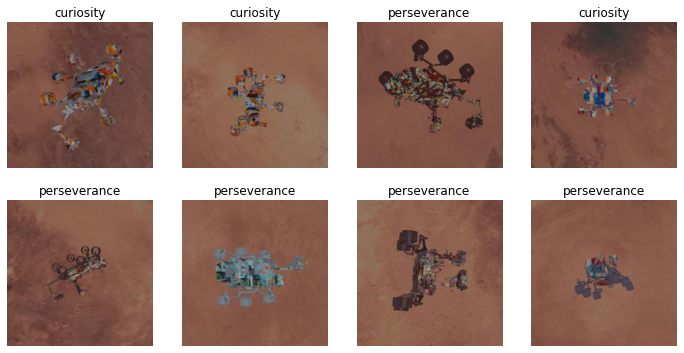

In [ ]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=8)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, alexnet, metrics=F1Score())

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,f1_score,time
0,0.413753,2.817455,0.668553,26:52


epoch,train_loss,valid_loss,f1_score,time
0,0.108014,5.535665,0.668110,1:02:39


Test

In [ ]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)


In [ ]:
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]
{0: 'curiosity', 1: 'perseverance'}

{0: 'curiosity', 1: 'perseverance'}


{0: 'curiosity', 1: 'perseverance'}

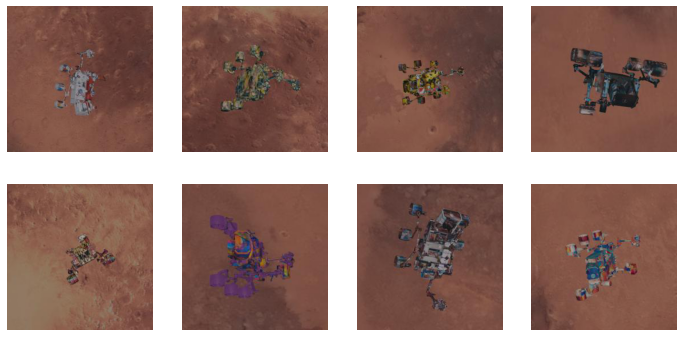

In [ ]:
test_dls.show_batch()


In [ ]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

In [ ]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

,ImageID,label
0,9958,perseverance
1,6394,perseverance
2,7578,perseverance
3,2364,perseverance
4,967,perseverance
...,...,...
9995,6058,perseverance
9996,4131,perseverance
9997,9381,perseverance
9998,322,perseverance


In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
!aicrowd submission create -c rover-classification -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 180.5/178.9 KB • 689.5 kB/s • 0:00:00
                                    ╭─────────────────────────╮                                     
                                    │ Successfully submitted! │                                     
                                    ╰─────────────────────────╯                                     
                                          Important links                                           
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions/126559              │
│                  │                                                                               │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions?my_submissions=true │
│                  │                                                                               │
│      Lea